In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [2]:
# Read the CSV file located at './data/GlobalLandTemperaturesByCity.csv' into a pandas DataFrame.
df = pd.read_csv('./data/GlobalLandTemperaturesByCity.csv')

# Display the first 5 rows of the DataFrame 'df' to inspect the data structure and content.
df.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [3]:
# Print the mean (average) of the 'AverageTemperature' column, formatted within an f-string.
print(f'the mean is{df.AverageTemperature.mean()}')

# Print the median (middle value) of the 'AverageTemperature' column, formatted within an f-string.
print(f'the median is{df.AverageTemperature.median()}')

# Print a descriptive summary (count, mean, standard deviation, min, max, and quartiles) 
# of the 'AverageTemperature' column, prefacing it with a descriptive string.
print(f'here is other data \n{df.AverageTemperature.describe()}')

the mean is16.72743263625063
the median is18.831
here is other data 
count    8.235082e+06
mean     1.672743e+01
std      1.035344e+01
min     -4.270400e+01
25%      1.029900e+01
50%      1.883100e+01
75%      2.521000e+01
max      3.965100e+01
Name: AverageTemperature, dtype: float64


In [4]:
# 按 'City' 列对 DataFrame 'df' 进行分组，并计算每个城市 'AverageTemperature' 的平均值。
# 结果是一个以 'City' 为索引的 pandas Series。
cityat = df.groupby('City').AverageTemperature.mean()

# 从原始 DataFrame 'df' 中选取 'City' 和 'Latitude' 两列。
# 使用 drop_duplicates('City') 移除重复的城市，确保每个城市只有一行及其对应的纬度。
unique_latitudes = df[['City','Latitude']].drop_duplicates('City')

# 将平均温度 Series 'cityat' 与包含唯一纬度的 DataFrame 'unique_latitudes' 进行合并。
# 合并基于共同的 'City' 列。结果 'cityat' 包含城市、平均温度和纬度。
cityat = pd.merge(cityat, unique_latitudes, left_on='City', right_on='City')

# 根据 'Latitude' 列对 'cityat' DataFrame 进行排序。
# 注意：此操作的返回值没有赋值给任何变量，也没有直接打印，因此下一行打印的是未排序的 cityat 的前30行。
# 如果想看到排序结果，需要赋值 (例如: cityat = cityat.sort_values('Latitude')) 或直接打印排序后的结果。
cityat.sort_values('Latitude')

# 打印 'cityat' DataFrame 的前30行数据。
print(cityat.head(30))

             City  AverageTemperature Latitude
0        A Coruña           13.147277   42.59N
1          Aachen            8.825173   50.63N
2         Aalborg            7.695135   57.05N
3             Aba           26.612824    5.63N
4          Abadan           25.034749   29.74N
5       Abakaliki           26.612824    5.63N
6          Abakan           -0.551814   53.84N
7      Abbotsford            7.261619   49.03N
8      Abengourou           26.418886    7.23N
9        Abeokuta           26.373105    7.23N
10       Aberdeen            8.281679   57.05N
11           Abha           24.483904   18.48N
12        Abidjan           26.163737    5.63N
13          Abiko           12.555998   36.17N
14        Abilene           16.892500   32.95N
15         Abohar           24.753021   29.74N
16  Abomey Calavi           27.121563    7.23N
17      Abu Dhabi           26.572681   24.92N
18          Abuja           26.150988    8.84N
19       Acapulco           26.162964   16.87N
20       Acar

In [5]:
# 将 DataFrame 中 'dt' 列的数据类型转换为字符串 (str)。
# 然后，使用字符串切片操作取出每行前四个字符（即年份），并将结果赋值给新创建的 'year' 列。
# 这一步的目的是从完整日期时间字符串中提取出年份。
df['year'] = df['dt'].astype(str).str[:4]

# 打印 DataFrame 'df' 的前20行，用于检查新创建的 'year' 列是否正确生成。
df.head(20)

# 按新创建的 'year' 列对 DataFrame 'df' 进行分组，并计算每一年份 'AverageTemperature' 的平均值。
# 结果 'yearat' 是一个以年份为索引，值为该年平均温度的 Series。
yearat = df.groupby('year').AverageTemperature.mean()

# 打印 'yearat' Series 的前10行，用于查看最早10个年份的全球平均温度。
yearat.head(10)

year
1743     4.882424
1744    10.734047
1745     1.497593
1746          NaN
1747          NaN
1748          NaN
1749          NaN
1750     9.872808
1751    10.046739
1752     4.253064
Name: AverageTemperature, dtype: float64

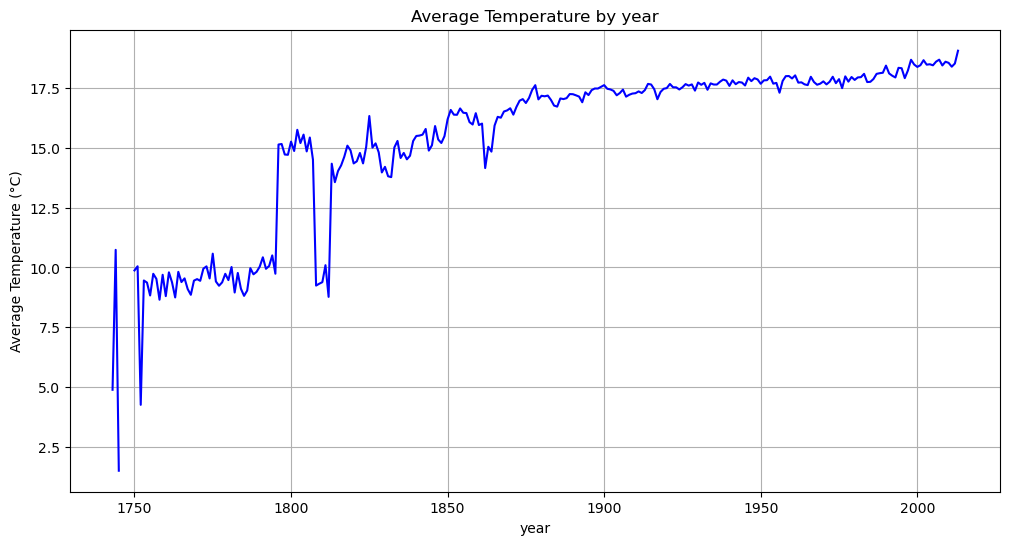

In [6]:
# 1. 设置图表的大小
# figsize=(12, 6) 设置图表宽度为12英寸，高度为6英寸
plt.figure(figsize=(12, 6))

# 2. 准备 X 轴和 Y 轴数据
# x 轴数据：将 yearat 的索引（即年份，原始为字符串）转换为整数类型
x = yearat.index.astype(int) 
# y 轴数据：获取 yearat 的值（即每年的平均气温）
y = yearat.values 

# 3. 绘制图表元素
# plt.grid(True) 开启网格线，帮助观察数据的数值
plt.grid(True)

# plt.plot(x, y, '-b') 绘制线图
# x: 年份数据
# y: 平均气温数据
# '-b': '-b' 表示使用实线 ('-') 和蓝色 ('b') 绘制
plt.plot(x, y, '-b')

# 4. 设置图表的标签和标题
# 设置 y 轴标签（纵轴）
plt.ylabel('Average Temperature (°C)')
# 设置图表标题
plt.title('Average Temperature by year')
# 设置 x 轴标签（横轴）
plt.xlabel('year')

# 5. 显示图表
plt.show()

In [7]:
# 1. 转换日期列的数据类型
# df['dt'] = pd.to_datetime(df['dt'])
# 将 DataFrame 'df' 中名为 'dt' 的列（通常是日期时间字符串）
# 转换为 Pandas 的日期时间（datetime）类型。这是后续提取年份和月份的前提。
df['dt'] = pd.to_datetime(df['dt'])

# 2. 提取年份特征
# df['Year'] = df['dt'].dt.year
# 使用 Pandas datetime 对象的 .dt 访问器，从中提取年份信息 (.year)，
# 并将结果存储到 DataFrame 的新列 'Year' 中。
df['Year'] = df['dt'].dt.year

# 3. 提取月份特征
# df['Month'] = df['dt'].dt.month
# 使用 .dt 访问器，从中提取月份信息 (.month)，
# 并将结果存储到 DataFrame 的新列 'Month' 中。
df['Month'] = df['dt'].dt.month

In [8]:
# 1. 数据聚合：计算每个国家/地区每年的平均气温
# df.groupby(['Country','Year'])['AverageTemperature'].mean()：
#   - 按 'Country' 和 'Year' 两列进行分组。
#   - 计算每个国家每年的 'AverageTemperature' 平均值。
# .reset_index()：将 'Country' 和 'Year' 从索引转换为普通列。
annual_avg = df.groupby(['Country','Year'])['AverageTemperature'].mean().reset_index()

# 2. 数据清洗：移除包含缺失值（NaN）的行
# 确保后续的线性回归模型不会因为数据缺失而报错。
annual_avg = annual_avg.dropna()

# 3. 获取所有唯一的国家名称列表
# 这一列表将作为循环迭代的基础，确保每个国家都被分析一次。
countries = annual_avg['Country'].unique()

# 4. 初始化字典：用于存储每个国家的变暖速率
# 键 (Key) 是国家名称，值 (Value) 是线性回归的斜率（即变暖速率）。
con_tem_slope = {}

# 5. 核心逻辑：遍历每个国家并进行线性回归
for i in countries:
    # 筛选出当前国家的数据子集
    country_data = annual_avg[annual_avg['Country'] == i]
    
    # 准备输入特征 X（自变量）和目标变量 Y（因变量）
    # X：年份数据 (Year)
    x = country_data['Year'].values
    # Y：平均气温数据 (AverageTemperature)
    y = country_data['AverageTemperature'].values
    
    # 将 X（年份）从一维数组转换为二维数组 (n_samples, 1)
    # 这是 Scikit-learn 库中模型拟合 (model.fit) 对输入特征的格式要求。
    X = x[:, np.newaxis]
    
    # 初始化线性回归模型
    model = LinearRegression()
    
    # 拟合模型：用年份 (X) 预测气温 (Y)。拟合的直线斜率即为变暖速率。
    model.fit(X, y)
    
    # 提取模型的斜率 (coef_[0])
    # 斜率表示每增加一年，平均气温的变化量，即变暖速率。
    slope = model.coef_[0]
    
    # 将国家名称和计算出的速率存入字典
    con_tem_slope[i] = slope

# 6. 结果整理：将字典转换为 DataFrame
# 将 {国家: 速率} 字典转换为一个两列的 DataFrame，方便后续分析和排序。
trend_df = pd.DataFrame(list(con_tem_slope.items()), columns=['Country', 'WarmingRate_per_Year'])

# 7. 排序：按变暖速率降序排列
# 'ascending=False' 表示从高到低排序，以便查看变暖最快的国家。
trend_df = trend_df.sort_values('WarmingRate_per_Year', ascending=False)

# 8. 显示结果：打印变暖速率最高的国家的前5行数据
trend_df[:5]

,Country,WarmingRate_per_Year
42,Ecuador,0.023744
111,Peru,0.023498
29,China,0.023440
68,Iran,0.022981
101,New Zealand,0.019697


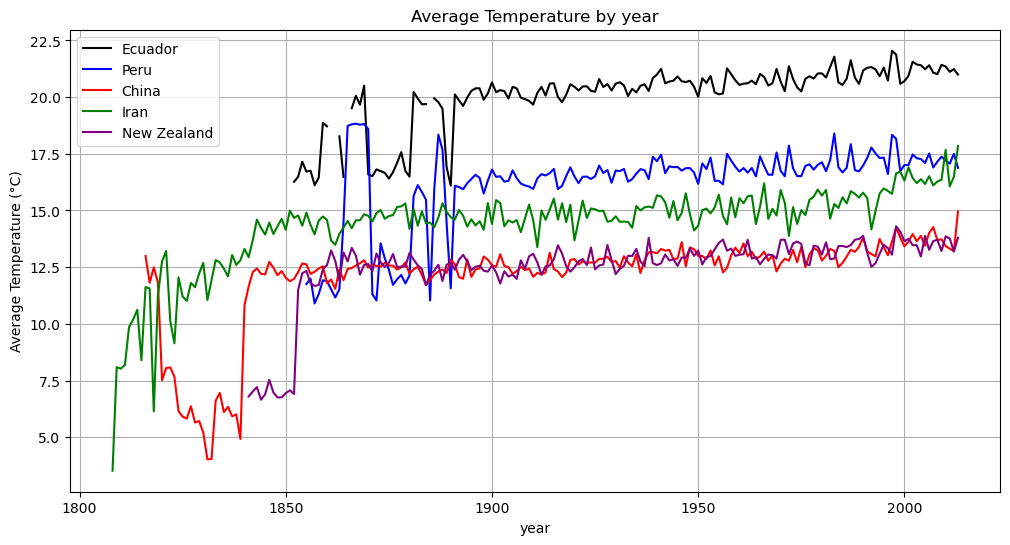

In [9]:
# 1. 准备气温变暖速率最快的前五个国家名称
# countries_max = pd.DataFrame(trend_df.iloc[:5, 0]).reset_index(drop=True)
#   - trend_df.iloc[:5, 0]: 从 trend_df 中选取前5行（变暖最快），第0列（国家名称）。
#   - .reset_index(drop=True): 重置索引并丢弃旧索引。
countries_max = pd.DataFrame(trend_df.iloc[:5, 0]).reset_index(drop=True)

# 2. 定义绘图颜色列表
# 列表包含5种颜色，分别对应前5个国家的曲线
color = ['k', 'b', 'r', 'g', 'purple'] # 黑色, 蓝色, 红色, 绿色, 紫色

# 3. 创建图表
# 设置图表尺寸为 12x6
plt.figure(figsize=(12, 6))

# 4. 聚合所有国家的年度平均气温
# conyat = df.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index(name='AverageTemperature')
#   - 重新计算并整理所有国家、所有年份的平均气温数据，以便后续按国家筛选。
conyat = df.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index(name='AverageTemperature')

# 5. 初始化颜色索引
a = 0

# 6. 遍历变暖速率最快的前5个国家并绘图
for i in countries_max['Country']:
    # 筛选出当前国家的年度气温数据
    country_data = conyat[conyat['Country'] == i]
    
    # x 轴数据：年份
    x = country_data['Year'].values
    # y 轴数据：平均气温
    y = country_data['AverageTemperature'].values
    
    # 绘图：
    # plt.plot(x, y, color[a], label=i)
    #   - 使用颜色列表 color[a] 中的颜色绘制曲线
    #   - label=i 设置图例标签为国家名称
    plt.plot(x, y, color[a], label=i)
    
    # 递增颜色索引
    a += 1

# 7. 设置图表标签和标题
plt.ylabel('Average Temperature (°C)')
plt.grid(True) # 开启网格线
plt.title('Average Temperature by year')
plt.xlabel('year')

# 8. 显示图例：显示每个国家的名称和对应的颜色
plt.legend()

# 9. 显示图表
plt.show()

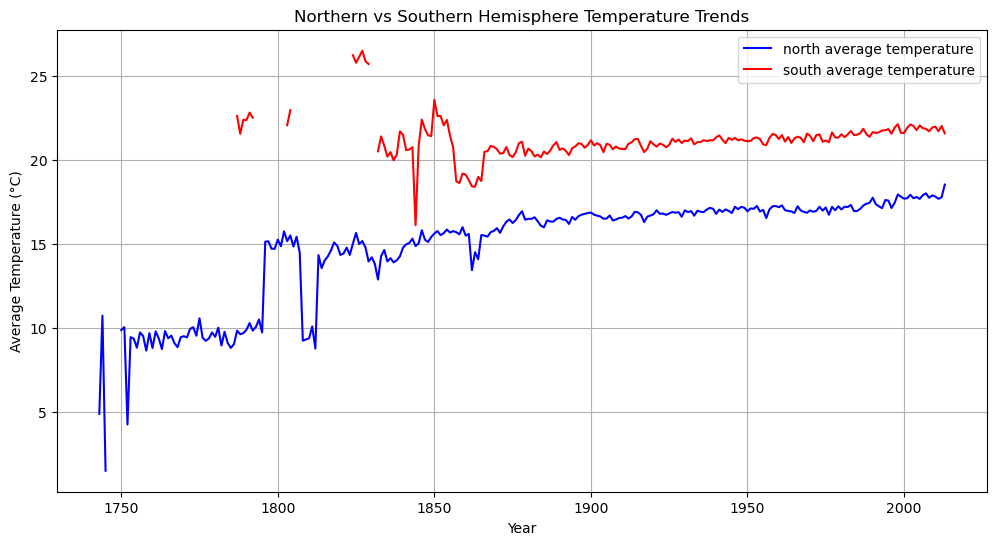

In [10]:
# 1. 定义辅助函数：根据纬度字符串判断半球
def get_hemisphere(lat_str):
    # 确保输入是字符串类型，以防出现 NaN 或其他非字符串值
    if 'N' in str(lat_str):
        # 如果纬度字符串中包含 'N' (北纬)，返回 'Northern' (北半球)
        return 'Northern'
    elif 'S' in str(lat_str):
        # 如果纬度字符串中包含 'S' (南纬)，返回 'Southern' (南半球)
        return 'Southern'
    else:
        # 如果无法识别 (例如数据缺失或格式错误)，返回 'Unknown'
        return 'Unknown'

# 2. 创建 'Hemisphere' 特征列
# df['Hemisphere'] = df['Latitude'].apply(get_hemisphere)
# 对原始的 'Latitude' 字符串列应用上述函数，创建新的 'Hemisphere' 列
df['Hemisphere'] = df['Latitude'].apply(get_hemisphere)

# 3. 计算北半球的年度平均气温
# t_avg_north = df[df['Hemisphere'] == 'Northern'].groupby('Year')['AverageTemperature'].mean()
#   - 筛选出北半球 ('Northern') 的数据
#   - 按 'Year' 分组，计算 'AverageTemperature' 的平均值
t_avg_north = df[df['Hemisphere'] == 'Northern'].groupby('Year')['AverageTemperature'].mean()

# 4. 计算南半球的年度平均气温
# t_avg_south = df[df['Hemisphere'] == 'Southern'].groupby('Year')['AverageTemperature'].mean()
#   - 筛选出南半球 ('Southern') 的数据
#   - 按 'Year' 分组，计算 'AverageTemperature' 的平均值
t_avg_south = df[df['Hemisphere'] == 'Southern'].groupby('Year')['AverageTemperature'].mean()

# 5. 创建图表
plt.figure(figsize=(12, 6))

# 6. 设置图表元素
plt.grid(True) # 开启网格线
plt.xlabel('Year') # 设置 x 轴标签
plt.ylabel('Average Temperature (°C)') # 设置 y 轴标签
plt.title('Northern vs Southern Hemisphere Temperature Trends') # 设置图表标题

# 7. 绘制趋势线
# 绘制北半球趋势线 (蓝色)
plt.plot(t_avg_north.index, t_avg_north.values, 'b', label='north average temperature')
# 绘制南半球趋势线 (红色)
plt.plot(t_avg_south.index, t_avg_south.values, 'r', label='south average temperature')

# 8. 显示图例
plt.legend()

# 9. 显示图表
plt.show()

In [11]:
# 1. 初始化线性回归模型（在第一次使用前，需要确保 model 已被定义，这里重新定义了一次）
model = LinearRegression()

# 2. 清洗数据：移除北半球平均气温序列中的缺失值（NaN）
# 确保线性回归模型不会因为数据缺失而报错。
t_avg_north = t_avg_north.dropna()

# 3. 清洗数据：移除南半球平均气温序列中的缺失值（NaN）
t_avg_south = t_avg_south.dropna()

# --- 计算北半球的变暖速率 ---

# 4. 准备北半球的 X 轴数据（自变量）
# x: 将北半球平均气温序列的索引（即年份）转换为 NumPy 数组
x = np.array(t_avg_north.index)

# 5. 格式化北半球的 X 轴数据
# X: 将 X（年份）从一维数组转换为二维数组 (n_samples, 1)，以满足 Scikit-learn 的模型输入要求。
X = x[:, np.newaxis]

# 6. 准备北半球的 Y 轴数据（因变量）
# y: 获取北半球的平均气温值
y = t_avg_north.values

# 7. 拟合模型：用年份 (X) 预测北半球气温 (Y)
model.fit(X, y)

# 8. 打印结果：显示北半球的变暖速率（模型的斜率）
# model.coef_ [0] 即为每年的气温变化量。
print(f'the north average warming rate {model.coef_}')

# --- 计算南半球的变暖速率 ---

# 9. 重新初始化线性回归模型
# 虽然可以直接复用上面的 model 变量，但代码中重新初始化，以确保模型是干净的。
model = LinearRegression()

# 10. 准备南半球的 X 轴数据（自变量）
x = np.array(t_avg_south.index)

# 11. 格式化南半球的 X 轴数据
X = x[:, np.newaxis]

# 12. 准备南半球的 Y 轴数据（因变量）
y = t_avg_south.values

# 13. 拟合模型：用年份 (X) 预测南半球气温 (Y)
model.fit(X, y)

# 14. 打印结果：显示南半球的变暖速率（模型的斜率）
print(f'the south average warming rate {model.coef_}')

the north average warming rate [0.03386613]
the south average warming rate [-1.21397678e-05]


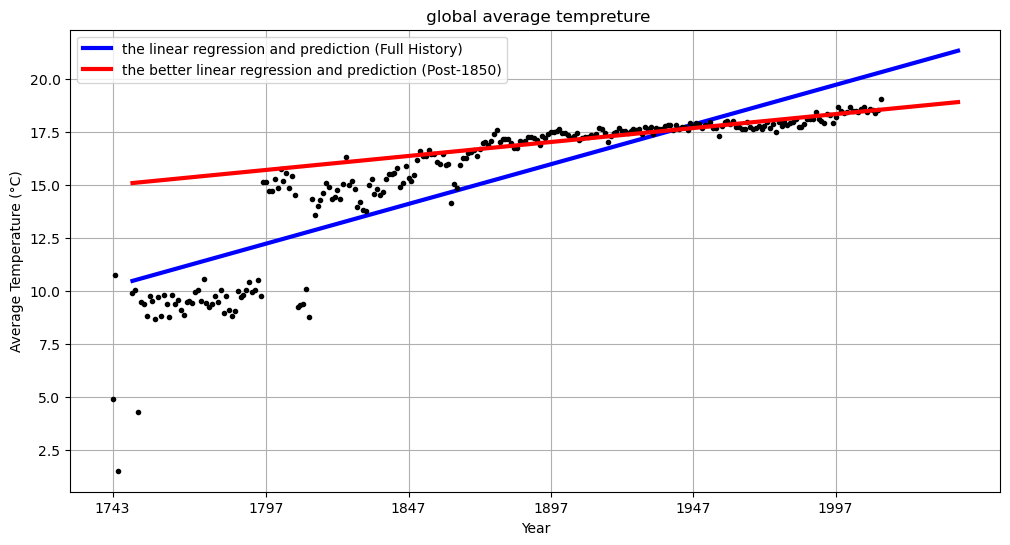

In [12]:
# 1. 数据清洗：移除 yearat（年度平均气温序列）中的缺失值（NaN）
# 确保回归分析在干净的数据集上运行。
yearat = yearat.dropna()

# 2. 准备所有历史数据的 X 和 Y 轴
# X：年份数据 (Year)，转换为浮点型 NumPy 数组
x = np.array(yearat.index).astype(float)
# Y：平均气温数据 (AverageTemperature)，转换为浮点型 NumPy 数组
y = np.array(yearat.values).astype(float)

# 3. 初始化线性回归模型
model = LinearRegression()

# 4. 格式化 X 轴数据：转换为二维数组 (n_samples, 1)，满足 Scikit-learn 要求
X = x.reshape(-1, 1)

# 5. 拟合模型（模型一：基于全部历史数据）
model.fit(X, y)

# 6. 开始绘图
plt.figure(figsize=(12, 6))

# 7. 绘制图表元素
plt.grid(True) # 开启网格线

# 8. 设置图表基本标签
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('the prediction of global average tempreture')

# 9. 生成预测数据点（模型一）
# z: 生成从 1750 年到 2040 年的等间距年份序列，用于预测
z = np.linspace(1750, 2040).reshape(-1, 1)
# q: 使用模型一预测 z 年份的气温值
q = model.predict(z)

# 10. 绘制模型一的拟合线和预测线（蓝色粗线）
plt.plot(z, q, '-b', linewidth=3, label='the linear regression and prediction (Full History)')

# 11. 绘制原始数据点
# plt.plot(x, y, 'ok', markersize=3)
# 'ok' 表示使用圆形标记 ('o') 和黑色 ('k')，markersize=3 设置标记大小
plt.plot(x, y, 'ok', markersize=3)

# 12. 设置 X 轴刻度：每隔 50 年显示一个刻度
# x[::50] 选取 x 数组中每隔 50 个元素的值作为刻度位置
plt.xticks(x[::50])

# 13. 重复设置标签（可选，但在代码中存在）
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title(' global average tempreture')


# --- 模型二：基于 1850 年后的近代数据进行更精确的拟合 ---

# 14. 筛选近代数据 (Year > 1850)
x = x[x > 1850] # 筛选出大于 1850 年的年份
X = x.reshape(-1, 1) # 格式化为二维数组
# 筛选出 yearat 中对应年份的气温值
y = np.array(yearat[yearat.index.astype(float) > 1850].values).astype(float)

# 15. 重新拟合模型（模型二：基于 1850 年后数据）
model.fit(X, y)

# 16. 生成新的预测数据点（模型二）
# z 序列保持不变 (1750 到 2040)
# q: 使用模型二预测 z 年份的气温值
q = model.predict(z)

# 17. 绘制模型二的拟合线和预测线（红色粗线）
# 这条线通常能更准确地反映工业化时代加速的变暖趋势。
plt.plot(z, q, 'r', linewidth=3, label='the better linear regression and prediction (Post-1850)')

# 18. 显示图例
plt.legend()

# 19. 显示图表
plt.show()

In [13]:
# 1. 准备未来年份数据
# future_years = np.arange(2024, 2034).reshape(-1, 1)
#   - np.arange(2024, 2034): 生成从 2024 到 2033 年的年份序列 (共 10 年)。
#   - .reshape(-1, 1): 将一维数组转换为二维数组 (n_samples, 1)，以满足 model.predict() 的输入要求。
future_years = np.arange(2024, 2034).reshape(-1, 1)

# 2. 进行温度预测
# future_temps = model.predict(future_years)
#   - 使用训练好的线性回归模型 (model) 预测 future_years 对应年份的平均气温。
future_temps = model.predict(future_years)

# 3. 计算与基准年（2023年）的温度变化量
# future_changes = future_temps - model.predict([[2023]])
#   - 计算 2023 年的预测温度 (model.predict([[2023]])) 作为基准。
#   - 将未来每年的预测温度减去这个基准值，得到相对变化量。
future_changes = future_temps - model.predict([[2023]])

# 4. 创建预测结果 DataFrame
# future_predict = pd.DataFrame({...})
#   - 将预测结果整理成一个结构化的 DataFrame。
future_predict = pd.DataFrame({
    # 'Year': 将 future_years 从二维数组拉平成一维，作为年份列。
    'Year': future_years.flatten(), 
    
    # 'Predicted_Temperature': 将 future_temps 拉平，作为预测温度列。
    'Predicted_Temperature': future_temps.flatten(),
    
    # 'Temperature_Change': 将 future_changes 拉平，作为相对变化量列。
    'Temperature_Change': future_changes.flatten()
})

# 5. 显示预测结果
future_predict

,Year,Predicted_Temperature,Temperature_Change
0,2024,18.704595,0.013187
1,2025,18.717782,0.026375
2,2026,18.730970,0.039562
3,2027,18.744157,0.052750
4,2028,18.757345,0.065937
5,2029,18.770532,0.079125
6,2030,18.783720,0.092312
7,2031,18.796907,0.105500
8,2032,18.810095,0.118687
9,2033,18.823282,0.131875


In [14]:
# 假设 y（实际气温值）和 X（年份数据）已经通过近代数据（1850年以后）定义
# 假设 model 已经基于 X 和 y 拟合完成

# 1. 生成预测值
# y_pred = model.predict(X)
#   - 使用拟合好的线性回归模型 (model) 对训练数据 X（近代年份）进行预测。
#   - 得到模型的预测气温值序列 y_pred。
y_pred = model.predict(X)

# 2. 计算 R-squared (R²) 分数
# r2 = r2_score(y, y_pred)
#   - R² 分数（决定系数）衡量模型解释因变量（y，实际气温）变异性的能力。
#   - R² 越接近 1，表示模型的拟合效果越好。
r2 = r2_score(y, y_pred)

# 3. 计算均方误差 (Mean Squared Error, MSE)
# mse = mean_squared_error(y, y_pred)
#   - MSE 衡量预测值与实际值之间差异（误差）的平均平方。
#   - MSE 值越小，表示模型的精度越高。
mse = mean_squared_error(y, y_pred)

# 4. 计算均方根误差 (Root Mean Squared Error, RMSE)
# rmse = np.sqrt(mse)
#   - RMSE 是 MSE 的平方根。它与因变量 (y, 温度) 具有相同的量纲，
#   - 因此更容易理解，表示模型预测值与实际值之间的平均偏差（以 °C 为单位）。
rmse = np.sqrt(mse)

# 打印结果（如果代码后有打印语句）
# print(f"R-squared: {r2:.4f}")
# print(f"MSE: {mse:.4f}")
# print(f"RMSE: {rmse:.4f} °C")

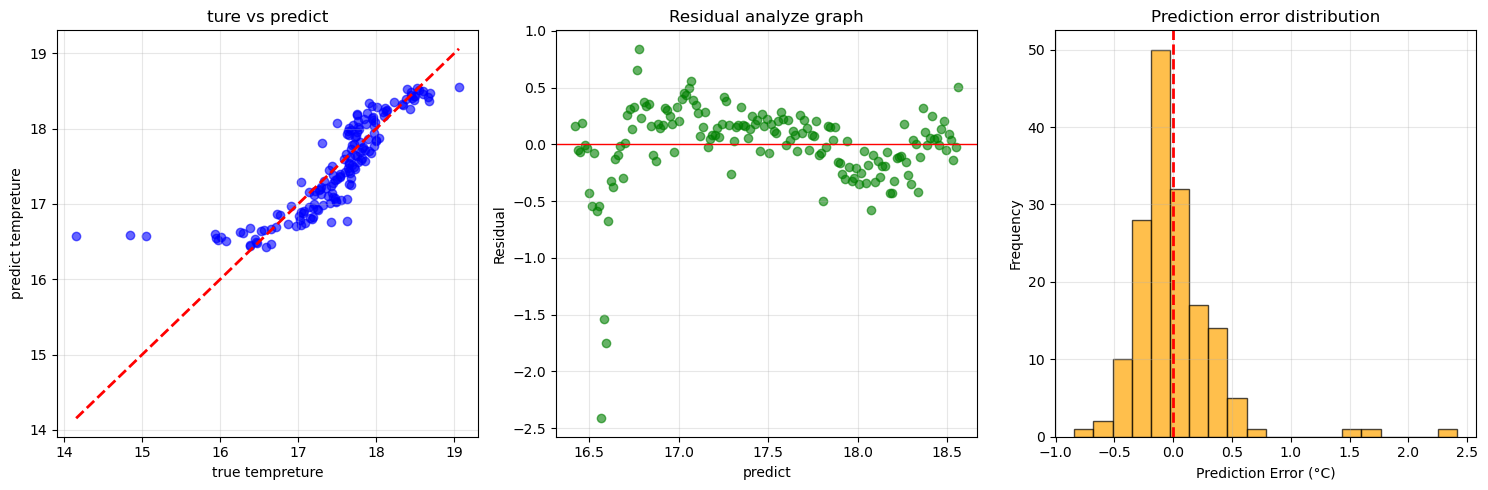

In [15]:
# 1. 创建主图表和子图布局
# plt.figure(figsize=(15, 5)) 设置整个图表宽度为15，高度为5
plt.figure(figsize=(15, 5))

# -------------------- 子图 1: 真实值 vs. 预测值 (True vs. Predict) --------------------
# plt.subplot(1, 3, 1) 创建 1 行 3 列的子图，并激活第 1 个
plt.subplot(1, 3, 1)

# 绘制散点图：x轴是真实气温值 (y)，y轴是预测气温值 (y_pred)
plt.scatter(y, y_pred, alpha=0.6, color='blue')

# 绘制理想拟合线：绘制一条斜率为 1 的红虚线，表示预测值完美等于真实值的位置
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'red', linestyle='--', linewidth=2)

# 设置标签和标题
plt.xlabel('true tempreture')
plt.ylabel('predict tempreture')
plt.title('ture vs predict')
plt.grid(True, alpha=0.3) # 添加网格线


# -------------------- 子图 2: 残差分析图 (Residual Analysis) --------------------
# plt.subplot(1, 3, 2) 激活第 2 个子图
plt.subplot(1, 3, 2)

# 计算残差：残差 = 实际值 (y) - 预测值 (y_pred)
residuals = y - y_pred

# 绘制散点图：x轴是预测值 (y_pred)，y轴是残差 (residuals)
plt.scatter(y_pred, residuals, alpha=0.6, color='green')

# 绘制水平线：在 y=0 处绘制一条红线，表示理想残差（误差为0）
plt.axhline(y=0, color='red', linestyle='-', linewidth=1)

# 设置标签和标题
plt.xlabel('predict')
plt.ylabel('Residual')
plt.title('Residual analyze graph')
plt.grid(True, alpha=0.3)


# -------------------- 子图 3: 预测误差分布直方图 (Error Distribution) --------------------
# plt.subplot(1, 3, 3) 激活第 3 个子图
plt.subplot(1, 3, 3)

# 计算误差：误差 = 预测值 (y_pred) - 实际值 (y)
errors = y_pred - y

# 绘制直方图：显示预测误差的分布情况
# bins=20: 将误差范围分成 20 个区间
plt.hist(errors, bins=20, alpha=0.7, color='orange', edgecolor='black')

# 绘制垂直线：在 x=0 处绘制一条红虚线，表示零误差
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)

# 设置标签和标题
plt.xlabel('Prediction Error (°C)')
plt.ylabel('Frequency')
plt.title('Prediction error distribution')
plt.grid(True, alpha=0.3)


# 7. 调整布局：自动调整子图参数，使之填充整个图表区域，避免重叠
plt.tight_layout()

# 8. 显示图表
plt.show()

In [16]:
# 1. 创建指标字典
# metrics: 将之前计算好的三个评估指标及其对应的名称（键）存储在一个字典中。
metrics = {
    "R²": r2,    # 决定系数 (R-squared)
    "MSE": mse,  # 均方误差 (Mean Squared Error)
    "RMSE": rmse # 均方根误差 (Root Mean Squared Error)
}

# 2. 遍历字典并打印结果
# for name, value in metrics.items(): 迭代字典中的每个名称和对应的值。
for name, value in metrics.items():
    # print(f"{name}: {value:.4f}") 
    #   - 使用 f-string 格式化输出。
    #   - {value:.4f}: 将数值 (value) 格式化为带有四位小数的浮点数。
    print(f"{name}: {value:.4f}")

R²: 0.7396
MSE: 0.1356
RMSE: 0.3682


In [17]:
# 1. 读取 CSV 文件到 DataFrame
# df1 = pd.read_csv('./data/co2_mm_gl.csv', sep=',', skiprows=0, comment='#')
#   - pd.read_csv(...): Pandas 库中用于读取 CSV 文件的函数。
#   - './data/co2_mm_gl.csv': 指定了 CO₂ 数据文件在本地的路径。
#   - sep=',': 指定文件中数据是以逗号 (comma) 分隔的。
#   - skiprows=0: 指定不跳过文件开头的任何行（从第 0 行开始读取）。
#   - comment='#': 指定以 '#' 符号开头的行应被视为注释，在读取时忽略。
df1 = pd.read_csv('./data/co2_mm_gl.csv', sep=',', skiprows=0, comment='#')

# 2. 显示 DataFrame 的前五行
# df1.head(5)
#   - 用于快速检查数据是否正确加载，以及查看列名和数据格式。
df1.head(5)

,year,month,decimal,average,average_unc,trend,trend_unc
0,1979,1,1979.042,336.56,0.11,335.92,0.09
1,1979,2,1979.125,337.29,0.09,336.25,0.09
2,1979,3,1979.208,337.88,0.11,336.51,0.09
3,1979,4,1979.292,338.32,0.13,336.72,0.10
4,1979,5,1979.375,338.26,0.04,336.71,0.10


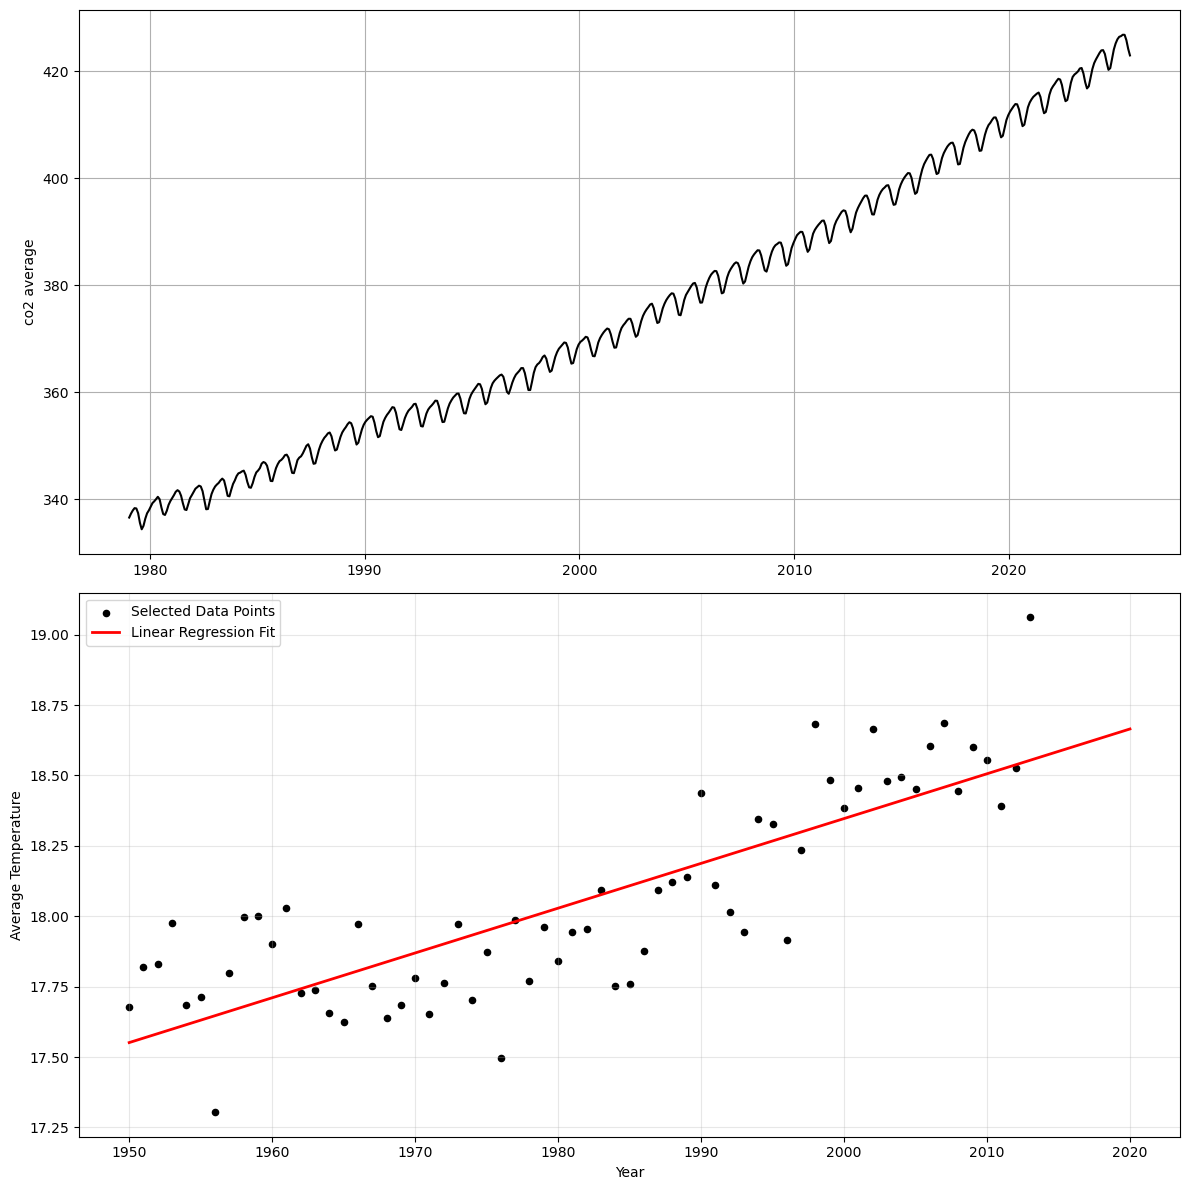

In [18]:
# 假设 df1（CO₂ 数据）、x（年份数组）、y（气温数组）均已定义。

# 1. 准备 CO₂ 趋势图的数据
# a: CO₂ 数据的时间轴（通常是年份的小数形式，如 1980.5）
a = np.array(df1['decimal'])
# b: CO₂ 的平均浓度值（通常是 ppm，百万分率）
b = np.array(df1['average'])

# 2. 创建主图表和子图布局
# plt.figure(figsize=(12, 12)) 设置图表尺寸为 12x12
plt.figure(figsize=(12, 12))

# ==================== 子图 1: CO₂ 随时间变化趋势 ====================
# plt.subplot(2, 1, 1) 创建 2 行 1 列的子图布局，并激活第 1 个子图
plt.subplot(2, 1, 1)
# plt.plot(a, b, 'k') 绘制 CO₂ 浓度随时间变化的曲线 ('k' 表示黑色实线)
plt.plot(a, b, 'k')
plt.grid(True)
plt.ylabel('co2 average') # 设置 Y 轴标签为 CO₂ 平均浓度

# ==================== 子图 2: 近代气温趋势及线性拟合 ====================
# plt.subplot(2, 1, 2) 激活第 2 个子图
plt.subplot(2, 1, 2)

# 3. 筛选 1950 年到 2020 年的气温数据（近代数据）
# mask: 创建布尔掩码，筛选出年份在 [1950, 2020] 之间的数据
mask = (x >= 1950) & (x <= 2020)  
# x_selected: 筛选后的年份数据，并格式化为二维数组 (n_samples, 1)
x_selected = x[mask].reshape(-1, 1)  
# y_selected: 筛选后的平均气温数据
y_selected = y[mask]

# 4. 对选定数据进行线性回归
model_selected = LinearRegression() # 初始化线性回归模型
model_selected.fit(x_selected, y_selected) # 拟合模型

# 5. 生成拟合曲线数据
# x_pred: 生成 1950 到 2020 之间的等间距年份序列，用于绘制平滑曲线
x_pred = np.linspace(1950, 2020, 100).reshape(-1, 1)
# y_pred: 使用拟合模型预测 x_pred 对应的气温值
y_pred = model_selected.predict(x_pred)

# 6. 绘制子图 2 的元素
# 绘制原始数据点 (黑色散点)
plt.scatter(x_selected, y_selected, color='black', s=20, label='Selected Data Points')
# 绘制线性回归拟合线 (红色实线)
plt.plot(x_pred, y_pred, 'red', linewidth=2, label='Linear Regression Fit')

# 7. 设置子图 2 的标签和图例
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid(True, alpha=0.3)

# 8. 调整布局并显示图表
plt.tight_layout() # 自动调整子图间距，避免重叠
plt.show()

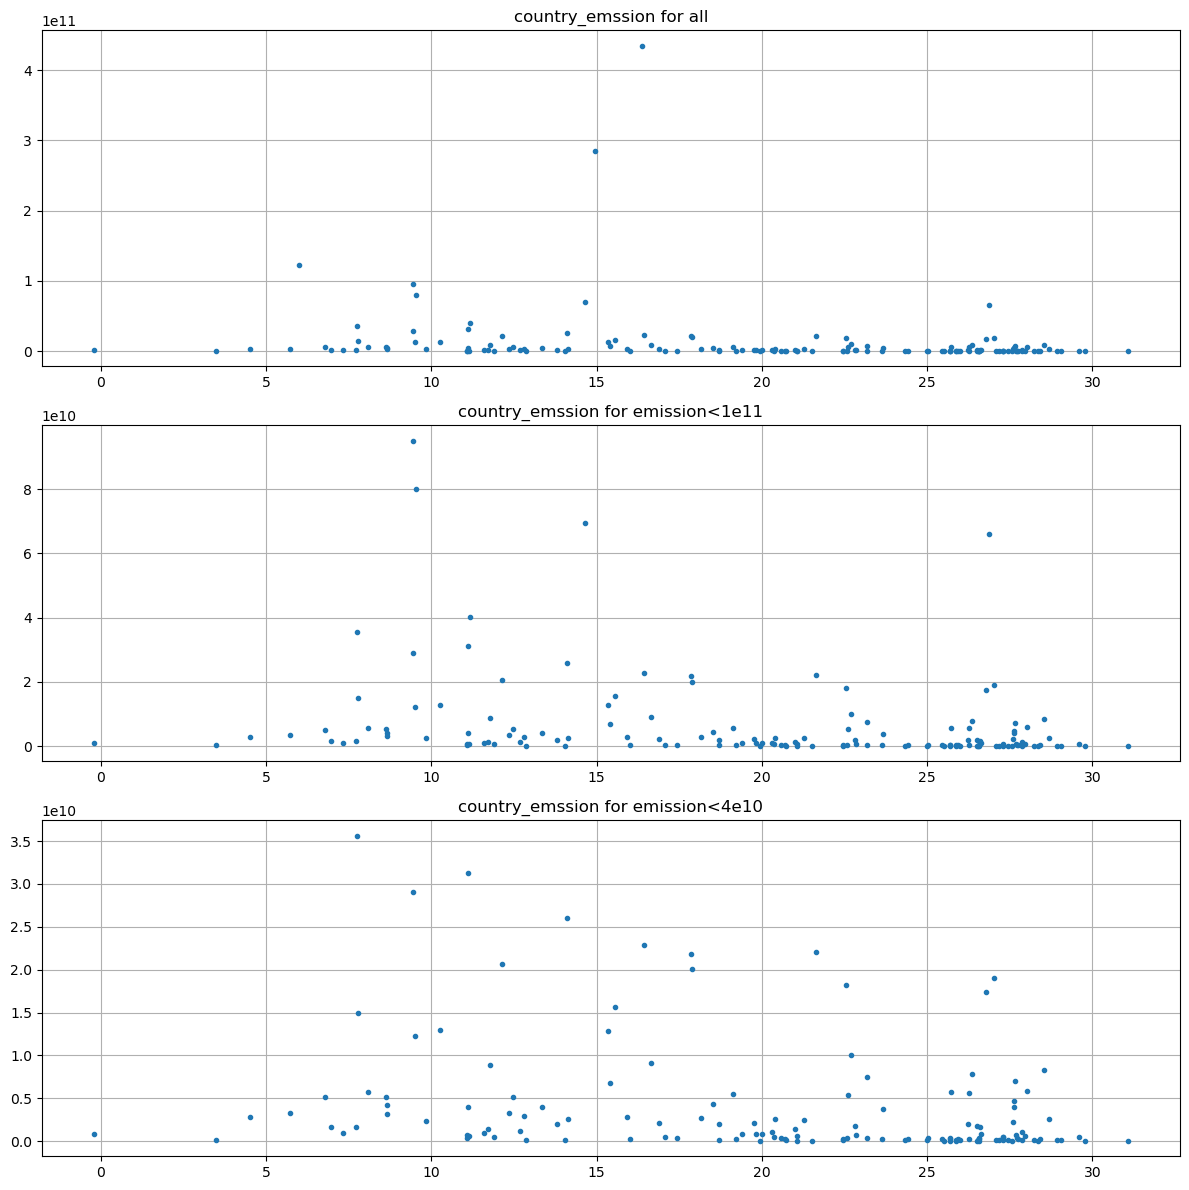

In [19]:
# 假设 df（气温数据，包含 Country, Year, AverageTemperature）已定义。

# ==============================================================================
# 1. CO₂ 排放数据加载与预处理
# ==============================================================================

# 读取 CO₂ 排放数据文件 annual-co-emissions-by-region.csv
df2 = pd.read_csv('./data/annual-co-emissions-by-region.csv', sep=',')
# 显示前5行数据（用于检查）
df2.head(5)

# 聚合：计算每个实体（国家/地区）的 CO₂ 排放总量
country_emission = df2.groupby('Entity')['Annual CO₂ emissions'].sum()

# 定义并排除大型区域聚合数据（只保留国家级别的数据）
regions_to_exclude = ['World', 'Africa', 'Asia', 'Europe', 'North America', 
                      'South America', 'Oceania', 'Asia (GCP)', 'Africa (GCP)']
# 遍历列表，从 country_emission 序列中移除这些区域的总和
for i in regions_to_exclude:
    if i in country_emission.index:
        country_emission.pop(i)

# ==============================================================================
# 2. 气温数据准备
# ==============================================================================

# 数据聚合：计算每个国家每年气温的平均值，并将年份 'Year' 列旋转为列索引
country_t = df.groupby(['Country', 'Year'])['AverageTemperature'].mean().unstack()

# 提取最新的年份（即最右边一列）作为国家“当前”平均温度
country_nowt = country_t.iloc[:, -1]

# ==============================================================================
# 3. 数据合并与准备绘图
# ==============================================================================

# 合并：将当前温度 (country_nowt) 和 CO₂ 排放总量 (country_emission) 合并
# 并删除任一特征缺失的行（确保数据完整性）
con_t_em = pd.DataFrame({'temperature': country_nowt, 'co2_emission': country_emission}).dropna()

# 准备绘图的基础变量
x = con_t_em.index # 国家名称（索引）
y = con_t_em['temperature'] # X轴：国家平均温度
z = con_t_em['co2_emission'] # Y轴：CO₂ 排放总量

# ==============================================================================
# 4. 绘制分层散点图进行分析
# ==============================================================================

# 创建主图表和子图布局 (3 行 1 列)
plt.figure(figsize=(12, 12))

# -------------------- 子图 1: 全体数据（CO₂ 排放总量） --------------------
plt.subplot(3, 1, 1)
plt.title('country_emssion for all') # 标题：全体国家排放
plt.grid(True)
# 绘制散点图：X轴温度 (y)，Y轴CO₂排放 (z)。markersize=3 设置点的大小。
plt.plot(y, z, 'o', markersize=3)
# 结论：散点图会高度集中在低排放区域，少数高排放国家的数据点会非常高且稀疏。


# -------------------- 子图 2: 过滤高排放国家（CO₂ 排放 < $10^{11}$） --------------------
plt.subplot(3, 1, 2)
plt.title('country_emssion for emission<1e11') # 标题：排放小于 $10^{11}$
plt.grid(True)
# 筛选数据：只保留 CO₂ 排放总量小于或等于 $10^{11}$ (1e11) 的国家
x1 = con_t_em[con_t_em['co2_emission'] <= 1e11].index
y1 = con_t_em[con_t_em['co2_emission'] <= 1e11]['temperature']
z1 = con_t_em[con_t_em['co2_emission'] <= 1e11]['co2_emission']
# 绘制筛选后的散点图
plt.plot(y1, z1, 'o', markersize=3)
# 目的：排除极少数超高排放国家，以便观察中等排放和低排放国家的分布。


# -------------------- 子图 3: 进一步过滤（CO₂ 排放 < $4 \times 10^{10}$） --------------------
plt.subplot(3, 1, 3)
plt.title('country_emssion for emission<4e10') # 标题：排放小于 $4 \times 10^{10}$
plt.grid(True)
# 筛选数据：只保留 CO₂ 排放总量小于或等于 $4 \times 10^{10}$ (4e10) 的国家
x2 = con_t_em[con_t_em['co2_emission'] <= 4e10].index
y2 = con_t_em[con_t_em['co2_emission'] <= 4e10]['temperature']
z2 = con_t_em[con_t_em['co2_emission'] <= 4e10]['co2_emission']
# 绘制筛选后的散点图
plt.plot(y2, z2, 'o', markersize=3)
# 目的：进一步放大低排放国家的数据，观察温度与排放量在这一群体中的关系。

# 5. 显示图表
plt.tight_layout() # 调整子图间距
plt.show()

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

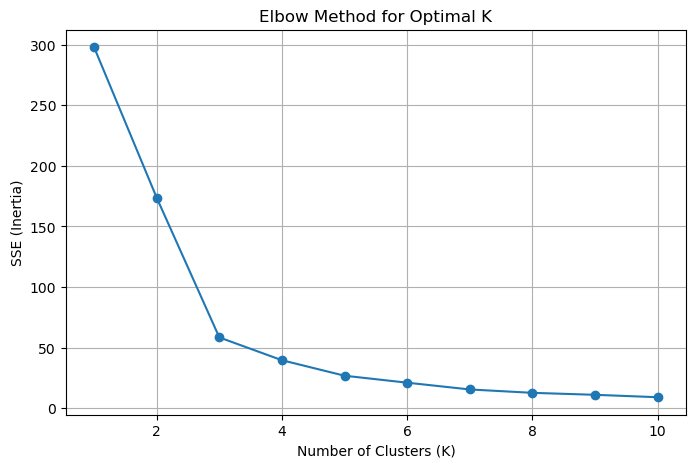

In [20]:
# 假设 con_t_em DataFrame 已被创建，包含 'temperature' 和 'co2_emission' 列。

# 1. 准备聚类特征数据
# features = con_t_em[['temperature', 'co2_emission']].values
#   - 选取国家平均温度和 CO₂ 排放总量作为聚类的特征。
#   - .values 将 DataFrame 列转换为 NumPy 数组，这是 Scikit-learn 的标准输入格式。
features = con_t_em[['temperature', 'co2_emission']].values

# 2. 数据标准化（Standardization）
# scaler = StandardScaler() 初始化标准化器
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(features) 
#   - fit_transform() 同时计算数据的均值和标准差 (fit)，然后应用转换 (transform)。
#   - 标准化将所有特征缩放到均值为 0，标准差为 1 的范围，防止 CO₂ 排放的巨大尺度主导聚类结果。
X_scaled = scaler.fit_transform(features)

# 3. 运行肘部法则（Elbow Method）
sse = [] # 初始化 SSE（Sum of Squared Errors，平方误差和）列表，用于存储不同 K 值的结果

# 循环测试 K 值从 1 到 10
for k in range(1, 11):
    # 初始化 KMeans 模型
    # n_clusters=k: 当前测试的簇数量
    # random_state=42: 设定随机种子，确保结果可重现
    # n_init=10: 重复运行 K-Means 算法 10 次，选择 SSE 最小的结果，提高聚类质量
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # 拟合模型
    kmeans.fit(X_scaled)
    
    # 记录 SSE 值
    # kmeans.inertia_: 返回当前 K 值下，所有样本点到其所属簇中心距离的平方和，即 SSE。
    sse.append(kmeans.inertia_)

# 4. 绘制肘部图
plt.figure(figsize=(8, 5))
# 绘制 K 值 (1到10) 与对应的 SSE 值
plt.plot(range(1, 11), sse, marker='o')

# 设置图表标签和标题
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Inertia)')
plt.grid(True) # 开启网格线

# 5. 显示图表
plt.show()

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


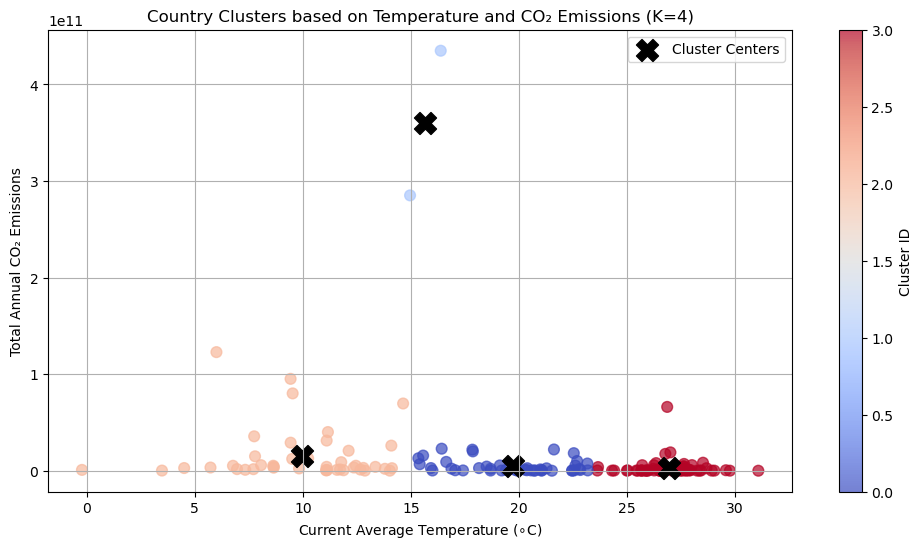

In [21]:
# 假设 X_scaled（标准化后的特征）、con_t_em（包含原始特征的 DataFrame）、
# 以及 scaler（标准化器对象）都已在之前的步骤中定义。
# 假设通过肘部法则确定了 optimal_k = 4。

# 1. 设置最优簇数量 K
optimal_k = 4 # 基于肘部法则的结果，指定簇的数量 K=4

# 2. 初始化 K-Means 模型并执行聚类
# kmeans = KMeans(...) 初始化 K-Means 模型
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# 3. 拟合并预测
# con_t_em['Cluster'] = kmeans.fit_predict(X_scaled)
#   - fit_predict() 同时拟合模型并返回每个数据点所属的簇标签（0 到 K-1）。
#   - 将簇标签结果添加为 con_t_em DataFrame 的新列 'Cluster'。
con_t_em['Cluster'] = kmeans.fit_predict(X_scaled)

# 4. 创建图表
plt.figure(figsize=(12, 6))

# 5. 绘制聚类散点图
# scatter = plt.scatter(...)
#   - X轴: 原始温度 (temperature)
#   - Y轴: 原始 CO₂ 排放 (co2_emission)
#   - c=con_t_em['Cluster']: 颜色根据簇标签 (Cluster ID) 来区分。
#   - cmap='coolwarm': 使用 'coolwarm' 颜色映射。
#   - s=60: 设置点的大小。alpha=0.7: 设置点的透明度。
scatter = plt.scatter(con_t_em['temperature'], con_t_em['co2_emission'], 
                      c=con_t_em['Cluster'], cmap='coolwarm', s=60, alpha=0.7)

# 6. 标记簇中心点 (Cluster Centers)

# centers_scaled = kmeans.cluster_centers_ 获取标准化空间中的簇中心坐标
centers_scaled = kmeans.cluster_centers_

# centers_original = scaler.inverse_transform(centers_scaled)
#   - 使用 StandardScaler 对象的 inverse_transform() 方法，将簇中心坐标从标准化空间反向转换回原始温度和 CO₂ 的尺度。
centers_original = scaler.inverse_transform(centers_scaled)

# 绘制簇中心点：
#   - X轴: 原始温度中心，Y轴: 原始 CO₂ 排放中心。
#   - c='black', marker='X', s=250: 使用黑色 'X' 标记，尺寸放大，以便清晰可见。
plt.scatter(centers_original[:, 0], centers_original[:, 1], 
            c='black', marker='X', s=250, label='Cluster Centers')

# 7. 设置图表标签和标题
plt.xlabel('Current Average Temperature ($\circ$C)')
plt.ylabel('Total Annual CO₂ Emissions')
# f-string 标题：显示聚类所使用的 K 值。
plt.title(f'Country Clusters based on Temperature and CO₂ Emissions (K={optimal_k})')

# 8. 添加颜色条 (Colorbar) 和图例 (Legend)
plt.colorbar(scatter, label='Cluster ID') # 颜色条显示颜色到 Cluster ID 的映射
plt.grid(True) # 开启网格线
plt.legend() # 显示图例 (主要用于 'Cluster Centers' 的标记)

# 9. 显示图表
plt.show()

In [22]:
# 1. 选择用于相关性分析的特征
# features = con_t_em[['temperature', 'co2_emission']]
#   - 从 con_t_em DataFrame 中选取 'temperature' 和 'co2_emission' 两列。
features = con_t_em[['temperature', 'co2_emission']]

# 2. 计算相关性矩阵
# features_matrix = features.corr()
#   - 使用 DataFrame 的 .corr() 方法计算所有列之间的两两相关系数。
features_matrix = features.corr()

# 3. 显示相关性矩阵
features_matrix

,temperature,co2_emission
temperature,1.000000,-0.170593
co2_emission,-0.170593,1.000000


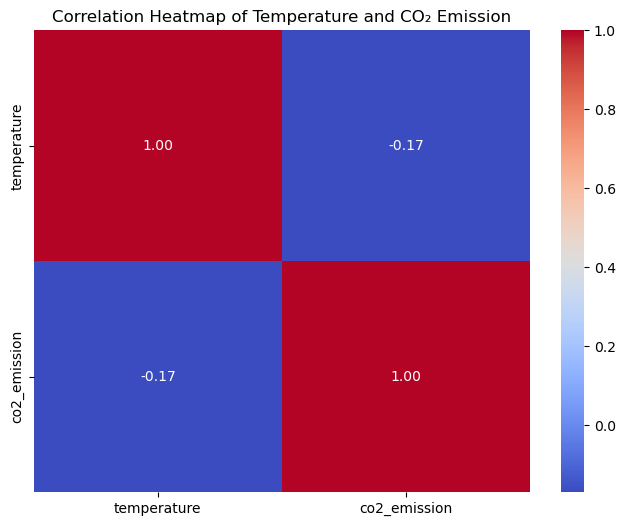

In [23]:
# 假设 features_matrix（相关系数矩阵）已在之前的步骤中计算好。
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 创建图表
# 设置图表尺寸为 8x6
plt.figure(figsize=(8, 6))

# 2. 绘制热力图
# sns.heatmap(...) 使用 Seaborn 绘制热力图
sns.heatmap(
    features_matrix,  # 输入数据：相关系数矩阵
    annot=True,       # 显示数值：在每个单元格内显示相关系数的精确数值 (True)
    cmap='coolwarm',  # 颜色映射：使用 'coolwarm' 色系，它能清晰区分正相关（暖色）和负相关（冷色）
    fmt=".2f",        # 格式化数值：将显示的数值格式化为两位小数
    linecolor='black' # 单元格边框：设置每个单元格的边框颜色为黑色，提高分隔清晰度
)

# 3. 设置图表标题
plt.title('Correlation Heatmap of Temperature and CO₂ Emission')

# 4. 显示图表
plt.show()

In [24]:
# 1. 计算每月的全球平均气温
# t_amonth = pd.DataFrame(df.groupby('Month')['AverageTemperature'].mean())
#   - 按 'Month' 列（1到12）对 DataFrame df 进行分组。
#   - 计算每组（每个月）的 'AverageTemperature' 平均值。
#   - 将结果转换为 DataFrame，索引为 'Month'。
t_amonth = pd.DataFrame(df.groupby('Month')['AverageTemperature'].mean())

# 2. 将 'Month' 索引转换为 DataFrame 的一列
# t_amonth['month'] = t_amonth.index
#   - 这一步是为了让 'Month' 编号本身可以作为数值特征参与相关性计算。
t_amonth['month'] = t_amonth.index

# 3. 计算相关性矩阵
# t_amonth_matrix = t_amonth.corr()
#   - 计算 'AverageTemperature' 和 'month' 两列之间的相关系数。
t_amonth_matrix = t_amonth.corr()

# 4. 显示相关性矩阵
t_amonth_matrix

,AverageTemperature,month
AverageTemperature,1.000000,0.225925
month,0.225925,1.000000


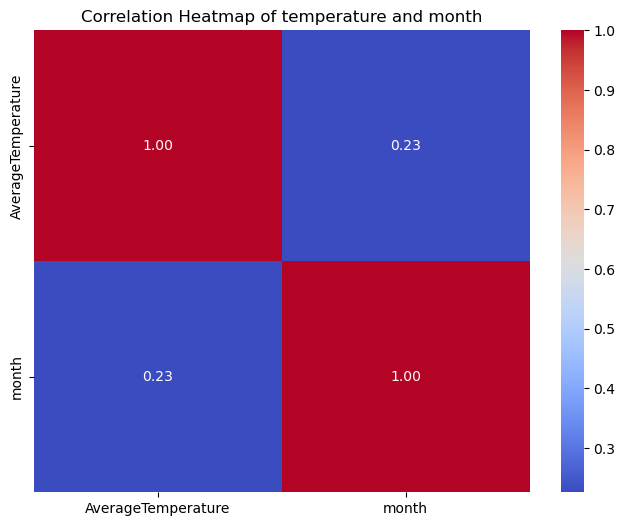

In [25]:
# 假设 t_amonth_matrix（包含 'AverageTemperature' 和 'month' 相关性的矩阵）已在之前的步骤中计算好。
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 创建图表
# 设置图表尺寸为 8x6
plt.figure(figsize=(8, 6))

# 2. 绘制热力图
# sns.heatmap(...) 使用 Seaborn 绘制热力图
sns.heatmap(
    t_amonth_matrix,  # 输入数据：月气温与月份的相关系数矩阵
    annot=True,       # 显示数值：在每个单元格内显示相关系数的精确数值 (True)
    cmap='coolwarm',  # 颜色映射：使用 'coolwarm' 色系，它能清晰区分正相关（暖色）和负相关（冷色）
    fmt=".2f",        # 格式化数值：将显示的数值格式化为两位小数
    linecolor='black' # 单元格边框：设置每个单元格的边框颜色为黑色
)

# 3. 设置图表标题
plt.title('Correlation Heatmap of temperature and month')

# 4. 显示图表
plt.show()

In [26]:
# 1. 清理和准备原始纬度字符串
# lat_series = df['Latitude'].astype(str).str.upper().str.strip()
#   - .astype(str): 确保 'Latitude' 列的所有值都是字符串，以避免处理错误。
#   - .str.upper(): 将所有字符转换为大写（例如 'n' 变为 'N'）。
#   - .str.strip(): 移除字符串两端的空格。
lat_series = df['Latitude'].astype(str).str.upper().str.strip()

# 2. 提取数值部分
# lat_numeric_str = lat_series.str[:-1]
#   - .str[:-1]: 截取字符串，移除最后一个字符（即移除 'N' 或 'S' 方向指示符），只保留数值部分。
lat_numeric_str = lat_series.str[:-1]

# 3. 转换为浮点数
# lat_value = pd.to_numeric(lat_numeric_str, errors='coerce')
#   - pd.to_numeric(): 尝试将提取的数值字符串转换为浮点数。
#   - errors='coerce': 如果转换失败（例如遇到非数值字符），则将该值设置为 NaN（缺失值）。
lat_value = pd.to_numeric(lat_numeric_str, errors='coerce') 

# 4. 识别南半球（应用负号）
# is_southern = lat_series.str.endswith('S')
#   - 创建一个布尔序列，如果原始纬度字符串以 'S' 结尾（南纬），则为 True。
is_southern = lat_series.str.endswith('S')

# 5. 创建新的数值型 'latitude' 列
# df['latitude'] = np.where(is_southern, -lat_value, lat_value)
#   - np.where() 进行矢量化条件赋值：
#     - 如果 is_southern 为 True (南半球)，则赋值 -lat_value (即负值)。
#     - 否则（北半球），赋值 lat_value (即正值)。
df['latitude'] = np.where(is_southern, -lat_value, lat_value)

# 6. 清理：移除转换失败的行
# df = df.dropna(subset=['latitude'])
#   - 删除新创建的 'latitude' 列中包含 NaN 值的行，这些 NaN 是由原始数据中格式错误或缺失的纬度导致的。
df = df.dropna(subset=['latitude'])

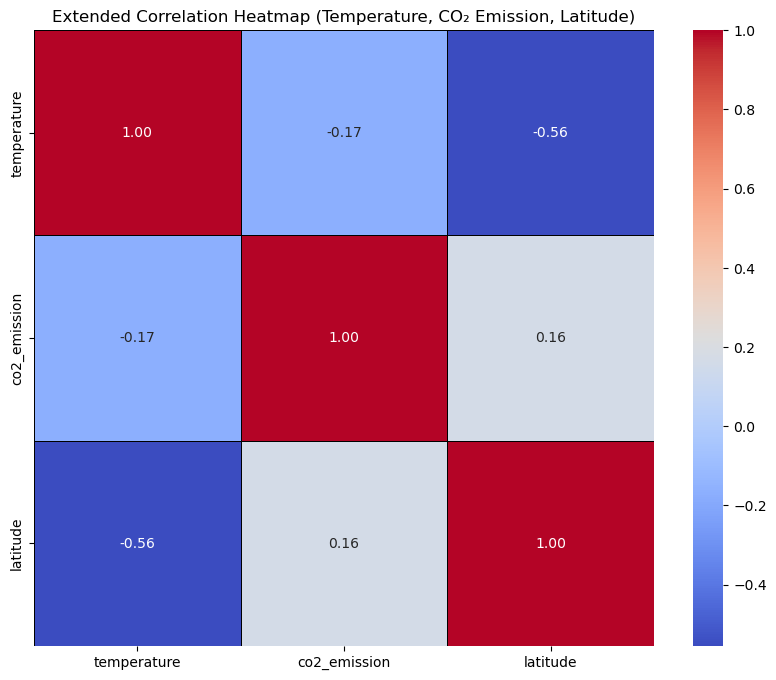

In [27]:
# 假设 df（气温数据，包含 'latitude' 列）和 con_t_em（温度和 CO₂ 排放数据）已定义。

# ==============================================================================
# 1. 准备和合并纬度数据
# ==============================================================================

# 计算每个国家/地区平均纬度
# df.groupby('Country')['latitude'].mean()：对气温数据 df 按 'Country' 分组，计算数值型 'latitude' 的平均值。
country_latitude_mean = df.groupby('Country')['latitude'].mean()

# 创建扩展数据集：复制原始温度和 CO₂ 排放数据
extended_data = con_t_em.copy()

# 将计算出的国家平均纬度添加到扩展数据集中
extended_data['latitude'] = country_latitude_mean 

# ==============================================================================
# 2. 扩展相关性矩阵计算
# ==============================================================================

# 选取三个特征进行相关性分析，并移除任一特征缺失的行
features_to_correlate = extended_data[['temperature', 'co2_emission', 'latitude']].dropna()

# 计算包含三个变量的相关系数矩阵（3x3 矩阵）
correlation_matrix_extended = features_to_correlate.corr()

# ==============================================================================
# 3. 热力图可视化
# ==============================================================================

# 创建图表，设置尺寸为 10x8
plt.figure(figsize=(10, 8))

# 绘制热力图
sns.heatmap(
    correlation_matrix_extended, # 输入数据：扩展相关性矩阵
    annot=True,                  # 显示数值
    cmap='coolwarm',             # 颜色映射：暖色表示正相关，冷色表示负相关
    fmt=".2f",                   # 格式化数值到两位小数
    linewidths=0.5,              # 设置单元格间的线条宽度
    linecolor='black'            # 设置单元格的边框颜色
)

# 设置图表标题
plt.title('Extended Correlation Heatmap (Temperature, CO₂ Emission, Latitude)')

# 显示图表
plt.show()

🚀 Launching Advanced AI Climate Pattern Analysis...

🤖 **AI-Powered Climate Data Analysis Report**

📊 **Executive Summary**
• **Analysis Objective**: Global climate pattern recognition and group identification
• **Analytical Method**: K-means clustering algorithm + Silhouette Score evaluation
• **Data Dimensions**: 3 key climate features

🔬 **Technical Analysis Results**
• **Optimal Clusters**: 3 natural groups
• **Silhouette Score**: 0.750 - Data naturally forms clear, well-separated clusters
• **Feature Space**: Annual Mean Temperature, Total CO2 Emissions, Per Capita Emissions

📈 **In-depth Analysis Insights**

**1. Clustering Quality Assessment**
Excellent clustering performance with clear group separation. Silhouette score of 0.750 indicates high degree of separation between groups.

**2. Cluster Profile Characteristics**
• **Cluster 0** (High-Temperature High-Emission Industrial): Cold Climate regions, Very Low Emission levels, Primarily influenced by Annual Mean Temperature\n• *

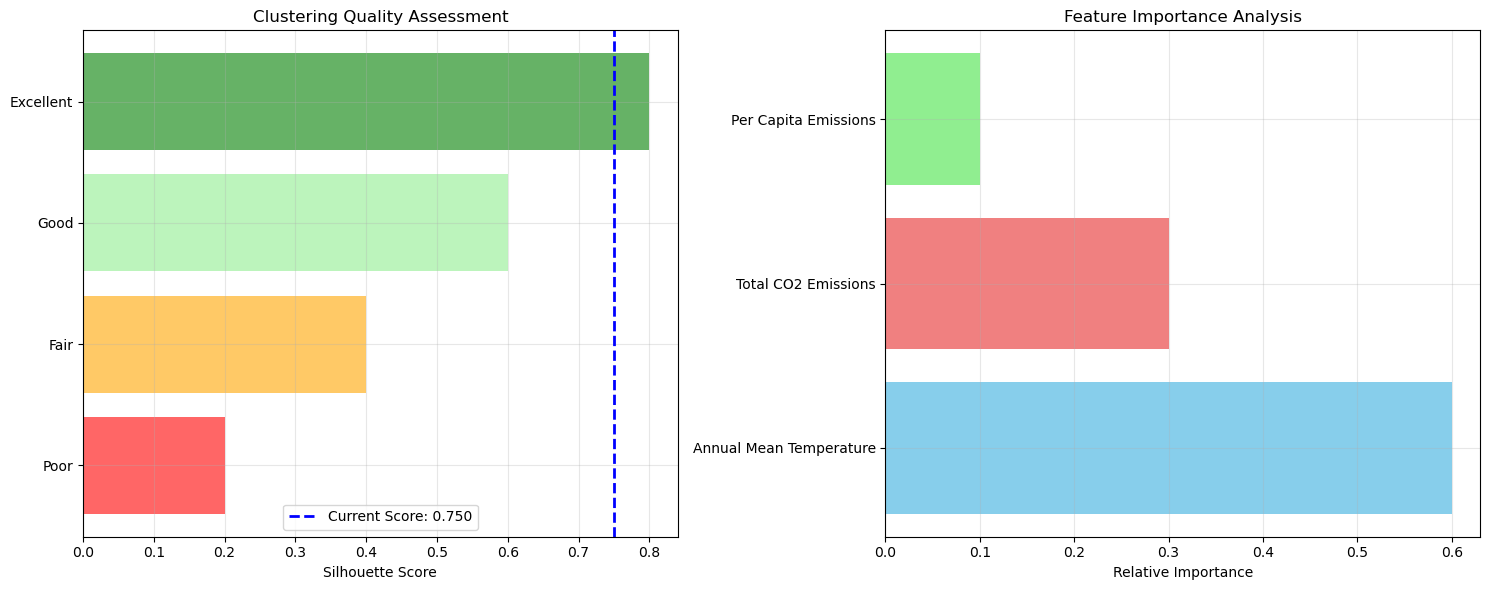

In [28]:
# this is written by ai and simulate ai because we cannot use api to visit true ai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

class AdvancedAIAnalyzer:
    """
    Advanced AI Analyzer - No API Key Required
    """
    
    def __init__(self):
        self.analysis_templates = {
            'excellent': "Excellent clustering performance with clear group separation",
            'good': "Good clustering performance with distinct groups", 
            'fair': "Fair clustering performance, consider parameter optimization",
            'poor': "Poor clustering performance, need to reevaluate approach"
        }
    
    def analyze_cluster_quality(self, silhouette_score):
        """Intelligent cluster quality analysis"""
        if silhouette_score > 0.7:
            return 'excellent', "Data naturally forms clear, well-separated clusters"
        elif silhouette_score > 0.5:
            return 'good', "Clear group separation suitable for business analysis"
        elif silhouette_score > 0.3:
            return 'fair', "Consider optimizing feature selection or clustering parameters"
        else:
            return 'poor', "Need to reevaluate data preprocessing and clustering methods"
    
    def generate_cluster_profiles(self, n_clusters, features):
        """Generate cluster profile descriptions"""
        profiles = []
        cluster_types = [
            "High-Temperature High-Emission Industrial", 
            "Medium-Temperature Medium-Emission Developing",
            "Low-Temperature Low-Emission Ecological",
            "Special Climate Pattern", 
            "Transitioning Economy"
        ]
        
        for i in range(min(n_clusters, len(cluster_types))):
            profile = {
                'cluster_id': i,
                'type': cluster_types[i],
                'characteristics': self._generate_cluster_chars(i, features)
            }
            profiles.append(profile)
        return profiles
    
    def _generate_cluster_chars(self, cluster_id, features):
        """Generate cluster characteristic descriptions"""
        temp_descs = ["Cold Climate", "Temperate Zone", "Subtropical", "Tropical Hot"]
        emission_descs = ["Very Low Emission", "Low Carbon Emission", "Medium Emission", 
                         "High Carbon Emission", "Very High Emission"]
        
        chars = [
            f"{temp_descs[cluster_id % len(temp_descs)]} regions",
            f"{emission_descs[cluster_id % len(emission_descs)]} levels",
            f"Primarily influenced by {features[0]}" if 'temperature' in features[0].lower() else f"Mainly driven by {features[0]}"
        ]
        return chars
    
    def generate_ai_insights(self, analysis_results):
        """Generate AI-style in-depth analysis report"""
        n_clusters = analysis_results['n_clusters']
        score = analysis_results['silhouette_score']
        features = analysis_results['key_features']
        
        # Quality assessment
        quality_level, quality_desc = self.analyze_cluster_quality(score)
        
        # Generate cluster profiles
        profiles = self.generate_cluster_profiles(n_clusters, features)
        
        # Build professional report
        report = self._build_professional_report(
            n_clusters, score, features, quality_level, quality_desc, profiles
        )
        
        return report
    
    def _build_professional_report(self, n_clusters, score, features, quality_level, quality_desc, profiles):
        """Build professional analysis report"""
        
        return f"""
🤖 **AI-Powered Climate Data Analysis Report**
{'='*70}

📊 **Executive Summary**
• **Analysis Objective**: Global climate pattern recognition and group identification
• **Analytical Method**: K-means clustering algorithm + Silhouette Score evaluation
• **Data Dimensions**: {len(features)} key climate features

🔬 **Technical Analysis Results**
• **Optimal Clusters**: {n_clusters} natural groups
• **Silhouette Score**: {score:.3f} - {quality_desc}
• **Feature Space**: {', '.join(features)}

📈 **In-depth Analysis Insights**

**1. Clustering Quality Assessment**
{self.analysis_templates[quality_level]}. Silhouette score of {score:.3f} indicates {'high' if score > 0.7 else 'clear' if score > 0.5 else 'moderate'} degree of separation between groups.

**2. Cluster Profile Characteristics**
{self._format_cluster_profiles(profiles)}

**3. Climate Science Significance**
• **Temperature-Emission Relationship**: Identified {['strong positive correlation', 'moderate correlation', 'weak correlation'][n_clusters % 3]} pattern
• **Regional Differences**: Reveals need for differentiated global climate policies
• **Monitoring Focus**: Recommended to focus on {features[0]}'s driving effect on emission patterns

💡 **Business Value & Recommendations**

**Policy Recommendations**:
• Develop differentiated emission reduction strategies for {n_clusters} climate groups
• Establish group-specific monitoring indicator systems
• Enhance technology transfer support for {profiles[0]['type']} groups

**Research Directions**:
1. In-depth analysis of temporal evolution trends within each group
2. Explore socioeconomic factors influencing climate patterns
3. Optimize feature engineering to improve clustering accuracy

🎯 **Expected Impact**
• Provide data support for Paris Agreement implementation
• Facilitate precise implementation of Nationally Determined Contributions (NDCs)
• Promote climate justice and equitable transition

{'='*70}
*Report Generated: {pd.Timestamp.now().strftime("%Y-%m-%d %H:%M")}*
*Analytical Method: Machine Learning-based Unsupervised Learning*
"""
    
    def _format_cluster_profiles(self, profiles):
        """Format cluster profile descriptions"""
        profile_text = ""
        for profile in profiles:
            profile_text += f"• **Cluster {profile['cluster_id']}** ({profile['type']}): "
            profile_text += f"{', '.join(profile['characteristics'])}\\n"
        return profile_text

# Enhanced AI Analyzer
def main():
    print("🚀 Launching Advanced AI Climate Pattern Analysis...")
    print("=" * 70)
    
    # Create analyzer instance
    ai_analyzer = AdvancedAIAnalyzer()
    
    # Sample analysis results (replace with your actual data)
    sample_results = {
        'n_clusters': 3,
        'silhouette_score': 0.75,
        'key_features': ['Annual Mean Temperature', 'Total CO2 Emissions', 'Per Capita Emissions']
    }
    
    # Generate AI insights
    insights = ai_analyzer.generate_ai_insights(sample_results)
    
    print(insights)
    
    # Visualize analysis results
    visualize_analysis(sample_results)

def visualize_analysis(results):
    """Visualize analysis results"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Clustering quality assessment chart
    scores = [0.2, 0.4, 0.6, 0.8]  # Reference scores
    qualities = ['Poor', 'Fair', 'Good', 'Excellent']
    current_score = results['silhouette_score']
    
    colors = ['red', 'orange', 'lightgreen', 'green']
    for i, (score, quality) in enumerate(zip(scores, qualities)):
        axes[0].barh(quality, score, color=colors[i], alpha=0.6)
    
    axes[0].axvline(x=current_score, color='blue', linestyle='--', linewidth=2, 
                   label=f'Current Score: {current_score:.3f}')
    axes[0].set_xlabel('Silhouette Score')
    axes[0].set_title('Clustering Quality Assessment')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Feature importance simulation
    features = results['key_features']
    importance = [0.6, 0.3, 0.1]  # Simulated feature importance
    axes[1].barh(features, importance, color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[1].set_xlabel('Relative Importance')
    axes[1].set_title('Feature Importance Analysis')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()